<a href="https://colab.research.google.com/github/mohithxoxo/Project/blob/master/Security_risk_of_two_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=84266b7de15c7877249e4f23919dbb2239bf25d3685490af6c3e887cf90a86ea
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
import yfinance as yf
tickerSymbol = 'AAPL'
tickerData = yf.Ticker(tickerSymbol)
Apple = tickerData.history(period='1d', start='2010-03-1')
print("Apple shares " ,"\n",Apple.tail())

tickerSymbol = 'WMT'
tickerData = yf.Ticker(tickerSymbol)
Walmart= tickerData.history(period='1d', start='2010-03-1')
print("\n","Walmart shares ","\n" ,Walmart.tail())

Apple shares  
               Open    High     Low   Close    Volume  Dividends  Stock Splits
Date                                                                         
2020-05-01  286.25  299.00  285.85  289.07  60154200        0.0           0.0
2020-05-04  289.17  293.69  286.32  293.16  33392000        0.0           0.0
2020-05-05  295.06  301.00  294.46  297.56  36937800        0.0           0.0
2020-05-06  300.46  303.24  298.87  300.63  35583400        0.0           0.0
2020-05-07  303.22  305.17  301.97  303.74  28690300        0.0           0.0

 Walmart shares  
               Open    High     Low   Close    Volume  Dividends  Stock Splits
Date                                                                         
2020-05-01  120.95  123.15  120.25  122.38  10381300       0.00             0
2020-05-04  123.30  123.86  121.18  123.16   5935900       0.00             0
2020-05-05  123.26  124.71  122.72  124.18   6445800       0.00             0
2020-05-06  124.66  124.94  

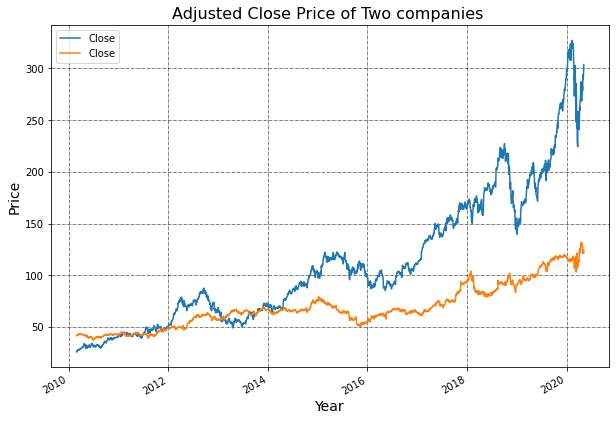

In [93]:
ap_wal_data = pd.DataFrame(data = [Apple['Close'],Walmart['Close']]).T
ap_wal_data.plot(figsize=(10, 7))
plt.legend()
plt.title("Adjusted Close Price of Two companies ", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [94]:
Apple = Apple.rename(columns={'Close' : 'AppleMP'})
Apple_returns = np.log(Apple['AppleMP'] / Apple['AppleMP'].shift(1))
Apple_returns.tail(20)

Date
2020-04-09    0.007190
2020-04-13    0.019437
2020-04-14    0.049269
2020-04-15   -0.009169
2020-04-16    0.007914
2020-04-17   -0.013662
2020-04-20   -0.020975
2020-04-21   -0.031398
2020-04-22    0.028396
2020-04-23   -0.003883
2020-04-24    0.028461
2020-04-27    0.000707
2020-04-28   -0.016342
2020-04-29    0.032317
2020-04-30    0.020877
2020-05-01   -0.016230
2020-05-04    0.014050
2020-05-05    0.014897
2020-05-06    0.010264
2020-05-07    0.010292
Name: AppleMP, dtype: float64

In [95]:
Walmart = Walmart.rename(columns={'Close' : 'WalmartMP'})
Walmart_returns = np.log(Walmart['WalmartMP'] / Walmart['WalmartMP'].shift(1))
Walmart_returns.tail(20)

Date
2020-04-09   -0.000330
2020-04-13    0.028292
2020-04-14    0.029150
2020-04-15   -0.001870
2020-04-16    0.027315
2020-04-17   -0.001595
2020-04-20   -0.017330
2020-04-21   -0.004963
2020-04-22    0.018256
2020-04-23   -0.023478
2020-04-24    0.007008
2020-04-27   -0.008807
2020-04-28   -0.002351
2020-04-29   -0.034974
2020-04-30   -0.016716
2020-05-01    0.011175
2020-05-04    0.006353
2020-05-05    0.008248
2020-05-06   -0.011501
2020-05-07   -0.007112
Name: WalmartMP, dtype: float64

In [96]:
"""## Apple"""

print ("Apple returns mean = ", Apple_returns.mean(),"\n\n",
       "Apple returns mean * 250 = ",Apple_returns.mean()*250,"\n\n",
       "Apple returns Standard Deviation = ",Apple_returns.std(),"\n\n",
       "Apple returns Standard Deviation * 250 * 0.5 = ",Apple_returns.std()*250**0.5)

Apple returns mean =  0.000959515477901775 

 Apple returns mean * 250 =  0.23987886947544373 

 Apple returns Standard Deviation =  0.0173990272859779 

 Apple returns Standard Deviation * 250 * 0.5 =  0.2751027764755399


In [97]:
"""## Walmart"""

print ("Walmart returns mean = ", Walmart_returns.mean(),"\n\n",
       "Walmart returns mean * 250 = ",Walmart_returns.mean()*250,"\n\n",
       "Walmart returns Standard Deviation = ",Walmart_returns.std(),"\n\n",
       "Walmart returns Standard Deviation * 250 * 0.5 = ",Walmart_returns.std()*250**0.5)

Walmart returns mean =  0.0004182681118031338 

 Walmart returns mean * 250 =  0.10456702795078346 

 Walmart returns Standard Deviation =  0.01188468398810685 

 Walmart returns Standard Deviation * 250 * 0.5 =  0.18791335336875567


In [98]:
"""## Final Results"""

print(Apple_returns.mean()*250)
print(Walmart_returns.mean()*250)

0.23987886947544373
0.10456702795078346


In [99]:
ap_wal = pd.DataFrame(data = [Apple_returns,Walmart_returns]).T
print (ap_wal[['AppleMP','WalmartMP']]*250,"\n\n",
ap_wal[['AppleMP','WalmartMP']].mean()*250**0.5)


             AppleMP  WalmartMP
Date                           
2010-03-01       NaN        NaN
2010-03-02 -0.192976  -1.443353
2010-03-03  0.578481   0.301386
2010-03-04  1.631797   1.381717
2010-03-05  9.573242   0.837321
...              ...        ...
2020-05-01 -4.057598   2.793784
2020-05-04  3.512415   1.588341
2020-05-05  3.724338   2.061951
2020-05-06  2.566097  -2.875224
2020-05-07  2.572950  -1.778058

[2566 rows x 2 columns] 

 AppleMP      0.015171
WalmartMP    0.006613
dtype: float64


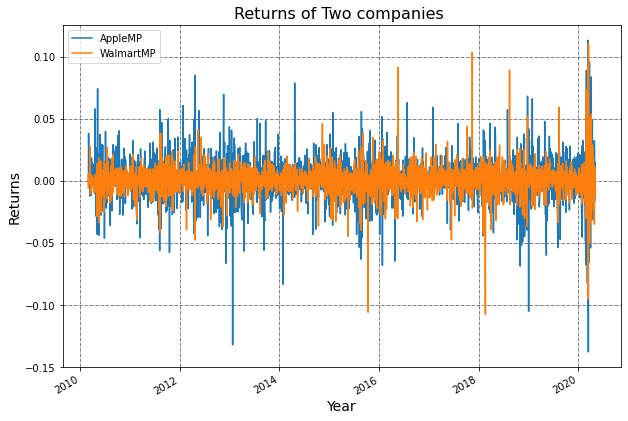

In [100]:
ap_wal.plot(figsize=(10, 7))
plt.legend()
plt.title("Returns of Two companies ", fontsize=16)
plt.ylabel('Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()